In [2]:
#Is there any trend of the listings price.
# import necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
seattle_calendar=pd.read_csv('C:/Users/HP/Documents/DataScienceBlogPost/calendar.csv')

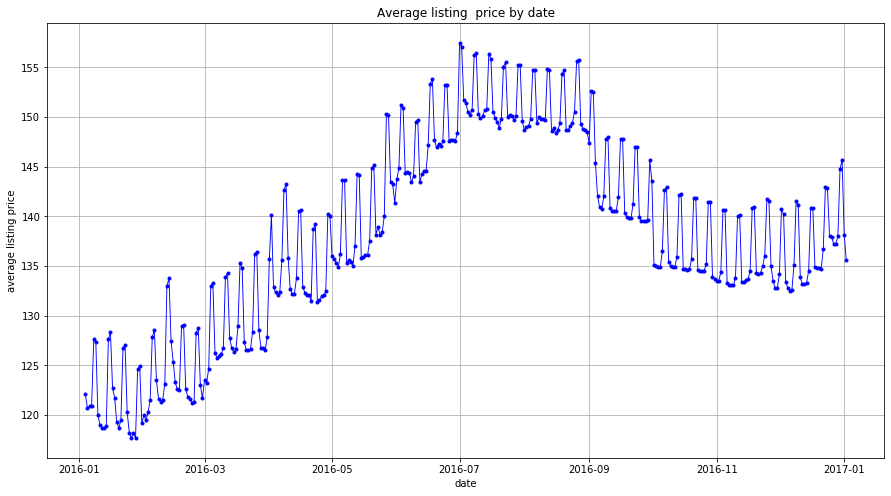

In [3]:
# process data
calendar_q3_df=seattle_calendar.copy(deep=True)
calendar_q3_df.dropna(inplace=True)
calendar_q3_df['date']=pd.to_datetime(calendar_q3_df['date'])
calendar_q3_df['price']=calendar_q3_df['price'].map(lambda x:float(x[1:].replace(",","")))
# apply aggregation
calendar_q3_df=calendar_q3_df.groupby('date')['price'].mean().reset_index()
# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_q3_df.date, calendar_q3_df.price, color='b',marker='.',linewidth=0.9)
plt.title("Average listing  price by date")
plt.xlabel('date')
plt.ylabel('average listing price')
plt.grid()




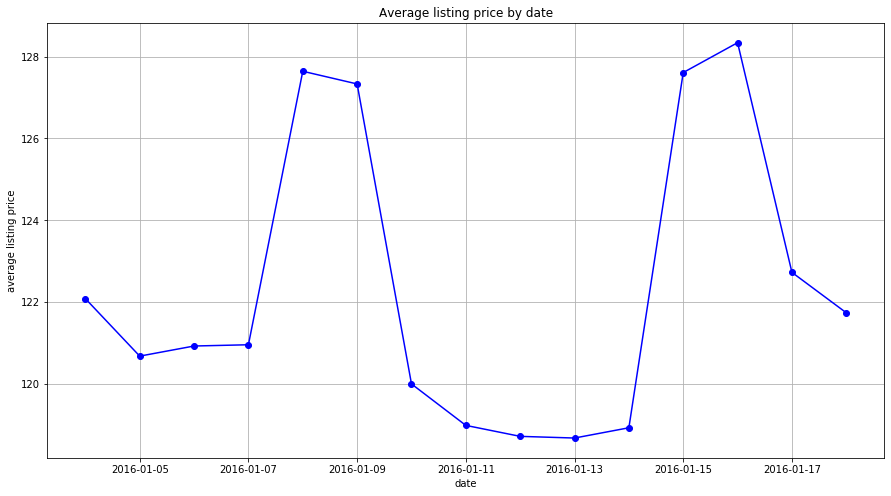

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(calendar_q3_df.date.values[:15], calendar_q3_df.price.values[:15], color='b', marker='o', linewidth=1.5)
plt.title("Average listing price by date")
plt.xlabel('date')
plt.ylabel('average listing price')
plt.grid()

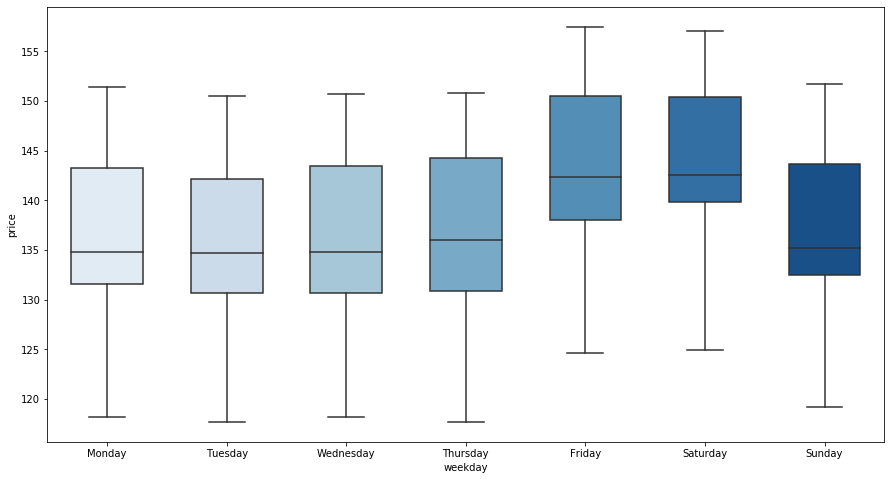

In [15]:
# create weekday column
calendar_q3_df["weekday"]=calendar_q3_df["date"].dt.weekday_name
# boxplot to see price distribution
plt.figure(figsize=(15,8))
sns.boxplot(x="weekday", y="price",data=calendar_q3_df, palette="Blues", width=0.6)
plt.show()


In [17]:
#The weekend, Friday and Saturday has high prices.
#Summary
#Each listings has 365 days record in this data.
#If available values are f, the price values are NaN.
#There is the weekly trend which the listing prices in weekend are higher than other weekday
seattle_listing = pd.read_csv('C:/Users/HP/Documents/DataScienceBlogPost/listings.csv')
seattle_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [21]:
print("Num of listings:", seattle_listing.id.count())
print("Num of rows:", seattle_listing.shape[0])
#This shows the each rows represents unique listings.

Num of listings: 3818
Num of rows: 3818


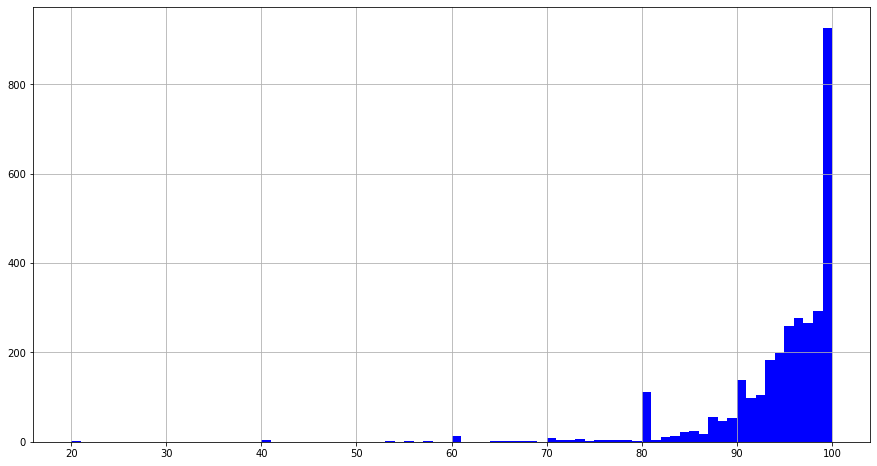

In [22]:
#Next, I am interested in below columns.
#review_scores_rating
#price
#maximum_nights
#What is the distribution of these values in each columns? Is the distribution skewed or normal?
#Let's look at!
# cleaning data
listings_q1_df=seattle_listing['review_scores_rating'].dropna()

#plot histogram
plt.figure(figsize=(15,8))
plt.hist(listings_q1_df.values, bins=80,color='b')
plt.grid()

In [ ]:
#This is very right skewed distribution.
#The 75% or more values are 90 points. And the most common thing is 100 points.
#I can say the low score listings are minolity.

In [24]:
#PRICE
#cleaning the data
listings_q2_df=seattle_listing.copy(deep=True)
listings_q2_df=listings_q2_df['price'].dropna().reset_index()
listings_q2_df['price']=listings_q2_df['price'].map(lambda x: float(x[1:].replace(',', '')))
listings_q2_df['price'].describe().reset_index()

,index,price
0,count,3818.000000
1,mean,127.976166
2,std,90.250022
3,min,20.000000
4,25%,75.000000
5,50%,100.000000
6,75%,150.000000
7,max,1000.000000


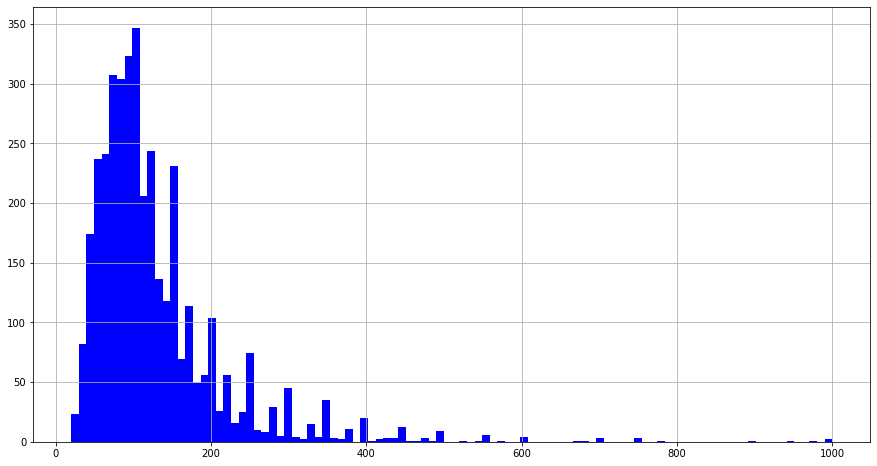

In [25]:
plt.figure(figsize=(15,8))
plt.hist(listings_q2_df.price,bins=100,color='b')
plt.grid()

In [ ]:
#This is long tail distribution.
#Almost values are from 0 to 200.

In [27]:
#Maximun Nights
seattle_listing['maximum_nights'].describe().reset_index()

,index,maximum_nights
0,count,3818.000000
1,mean,780.447617
2,std,1683.589007
3,min,1.000000
4,25%,60.000000
5,50%,1125.000000
6,75%,1125.000000
7,max,100000.000000


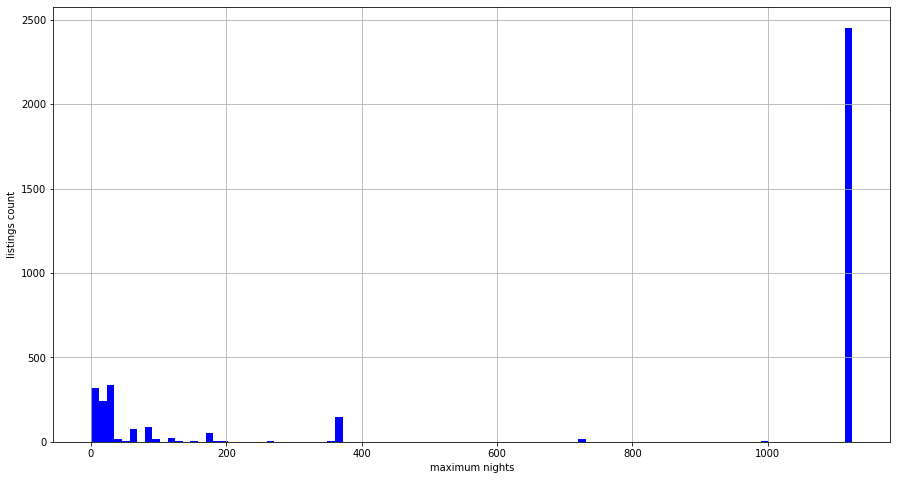

In [32]:
listings_q3_df=seattle_listing[seattle_listing['maximum_nights']<=1500]
plt.figure(figsize=(15, 8))
plt.hist(listings_q3_df.maximum_nights, bins=100, color='b')
plt.xlabel('maximum nights')
plt.ylabel('listings count')
plt.grid()

In [ ]:
#Summary
#The listings data has 92 columns.
#The review_scores_rating has right skewed distribution, and almost values are over 90 points.
#The price has long tail distribution, almost values are around 100$ but some values are much higher than other values.
#The maximum_nights has very special distribution. Their are two segments, one is about 3 years, the other is around 1week.
#OK, let's look at last data.

In [33]:
seattle_reviews=pd.read_csv('C:/Users/HP/Documents/DataScienceBlogPost/reviews.csv')
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [35]:
seattle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


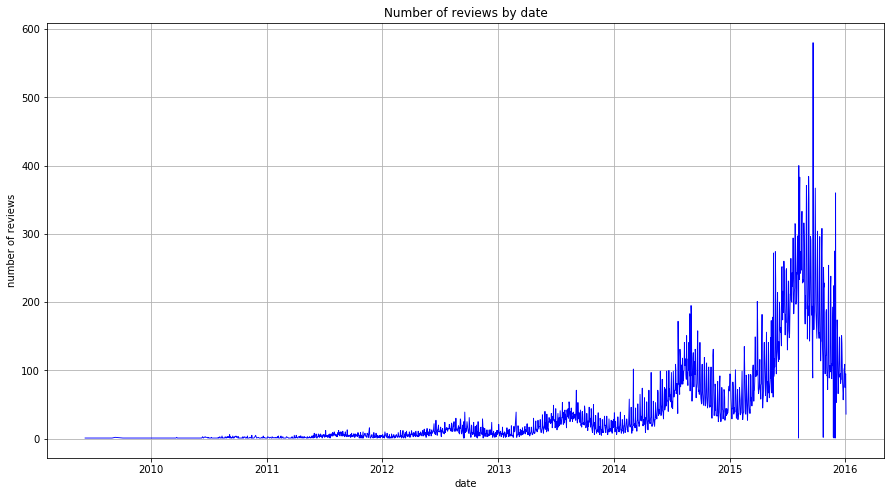

In [60]:
# convert date column's data type to date from object
review_q1_df=seattle_reviews.copy(deep=True)
review_q1_df.date=pd.to_datetime(review_q1_df.date)
review_q1_df=review_q1_df.groupby('date')['id'].count().reset_index()
# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(review_q1_df.date, review_q1_df.id, color='b', linewidth=0.9)
plt.title("Number of reviews by date")
plt.xlabel('date')
plt.ylabel('number of reviews')
plt.grid()


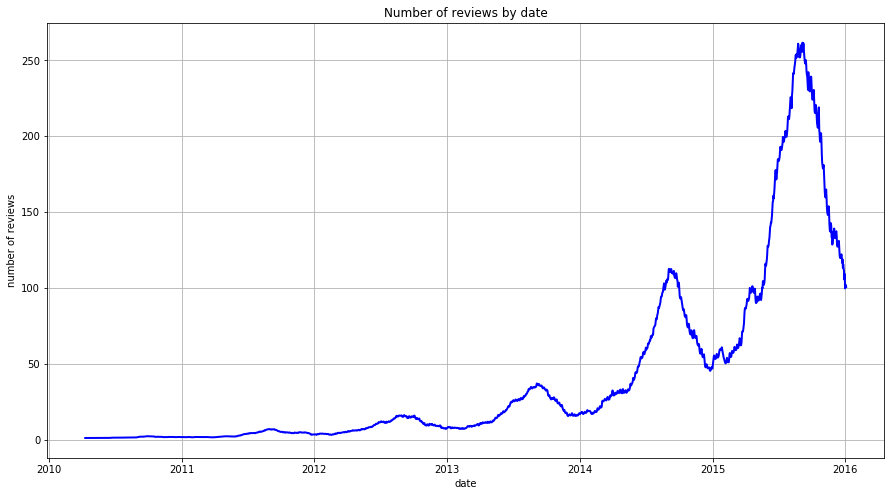

In [45]:
# create rolling mean column
review_q1_df["rolling_mean_30"]=review_q1_df.id.rolling(window=30).mean()
plt.figure(figsize=(15,8))
plt.plot(review_q1_df.date, review_q1_df.rolling_mean_30, color='b',linewidth=2.0)
plt.title("Number of reviews by date")
plt.xlabel('date')
plt.ylabel('number of reviews')
plt.grid()

In [ ]:
#I tried thirty days (about 1 month) window.
#The graph became smooth and the trend became clear, and my belief that the peaks were in the same place became stronger.
#Next, I extract when the peak comes in each year.

In [50]:
#Answer my Question
#Up to this point, I can answer two of the three questions mentioned at the beginning. 
#First of all, let's answer from the question. How long is the period available for lending by rooms?

#This was shown when investigating listing data. There were two groups in listings. 
#It's a listing available at spots with a maximum nights less than a week and a listing of a sense of renting available for up to three years.

#For a further discussion, plot a scatter plot of maximum nights and minimum nights.

0        364
1         88
2         26
3       1124
4       1124
        ... 
3813    1122
3814      27
3815       6
3816    1122
3817    1124
Name: min_max_night_diff, Length: 3816, dtype: int64


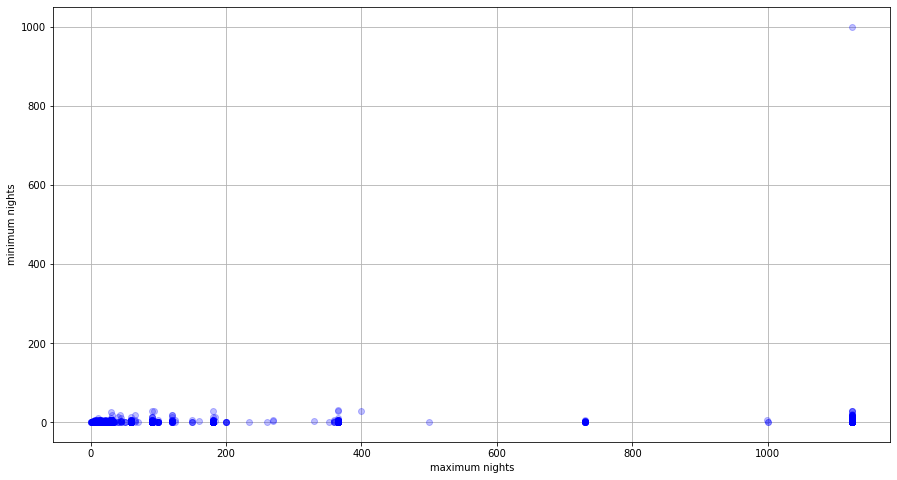

In [52]:
listings_q3_df["min_max_night_diff"]=listings_q3_df.maximum_nights - listings_q3_df.minimum_nights
print(listings_q3_df["min_max_night_diff"])
plt.figure(figsize=(15, 8))
plt.plot(listings_q3_df.maximum_nights, listings_q3_df.minimum_nights, color='b', marker='o', linewidth=0, alpha=0.25)
plt.xlabel('maximum nights')
plt.ylabel('minimum nights')
plt.grid()

In [ ]:
#From here, it can be seen that the minimum nights is almost constant regardless of the maximum nights. 
#In other words, it can be seen that listings with a long maximum nights are not rented exclusively for rental, 
#but are widely handled from spot use to long-term stay.

In [ ]:
#Let's answer the second question.
#Is there a busy season?

#It can not be said exactly because the actual duration of the user's stay are not included in the data, 
#but the number of reviews is considered to be a guide. In addition, 
#since periodical peaks appear in the number of reviews annually, 
#it may be considered that the neighborhood is a busy season.

#We found that the biggest busy season was the beginning of September, 
#but how long will it be the busy season? Let's look in more detail!

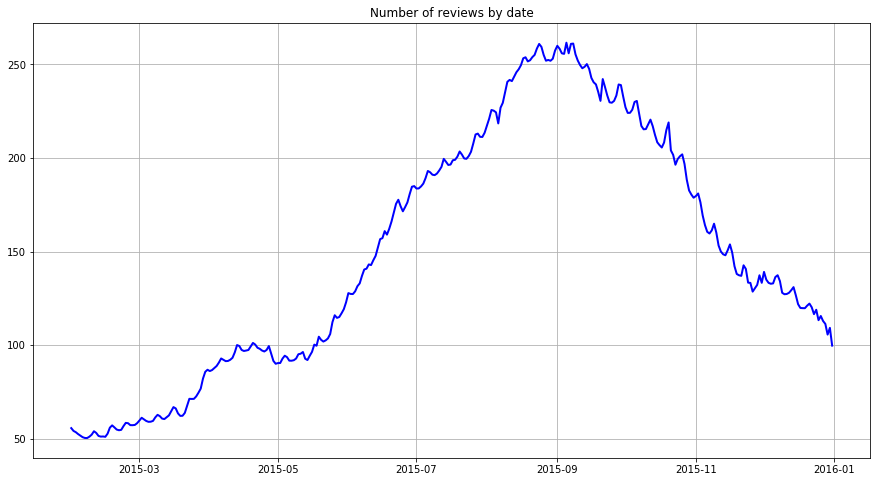

In [65]:
review_q1_df["year"] = review_q1_df.date.dt.year
review_q2_df=review_q1_df[review_q1_df.year==2015]
review_q2_df["rolling_mean_30"]=review_q2_df.id.rolling(window=30).mean()
plt.figure(figsize=(15,8))
plt.plot(review_q2_df.date, review_q2_df.rolling_mean_30, color='b', linewidth=2.0)
plt.title("Number of reviews by date")
plt.grid()

In [ ]:
#It's hard to say clearly when to begin and when to end.
#But, from here it may be able to say the busy season is One month before and after from September.